In [1]:
#importing the libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading our dataset
cardio_data = pd.read_csv('cardio_train[1].csv',sep=';')
cardio_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Description of the Columns

|Feature                  |  Variable Type        |   Variable    |  Value Type        |
|:--------:               |:----------------:     |:-------------:|:------------------:|
|Age                      |Objective Feature      | age           |int (days)          |
|Height                   |Objective Feature      | height        |int (cm)            |
|Weight                   |Objective Feature      |weight         |float (kg)          |
|Gender                   |Objective Feature      |gender         |categorical values  |
|Systolic blood pressure  |Examination Feature    |ap_hi          |int                 |
|Diastolic blood pressure |Examination Feature    |ap_lo          |int                 |
|Cholesterol              |Examination Feature    |cholesterol    |1: normal, 2: above normal, 3: well above normal|
|Glucose                  |Examination Feature    |gluc           |1: normal, 2: above normal, 3: well above normal|
|Smoking                  |Subjective Feature     |smoke          |binary              |
|Alcohol intake           |Subjective Feature     |alco           |binary              |
|Physical activity        |Subjective Feature     |active         |binary              |
|Presence or absence of cardiovascular disease    |Target Variable        | cardio        |binary              |

In [3]:
#checking the data type of esch colmuns
cardio_data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [4]:
#checking the inforamtio of the dataset
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


**Note: From the information we discover that there are no missing values**

In [5]:
#examine if there are no missing value truly.
cardio_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Checking for inconsistency and performing Data Cleaning

In [6]:
#renaming some columns for better understanding.
cardio_data.rename({'ap_hi' : 'Systolic_blood_pressure',
                   'ap_lo' : 'Diastolic_blood_pressure',
                   'gluc' : 'glucose', 
                   'alco' : 'alcohol'},axis = 1, inplace = True)
cardio_data.head()


,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
#from the age column, the values there are in tens of thousand
#we have to change it to 2 digit number and converting to int
cardio_data['age'] = (cardio_data['age'] / 365).astype('int')
cardio_data['age']

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int32

In [8]:
cardio_data.head()

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


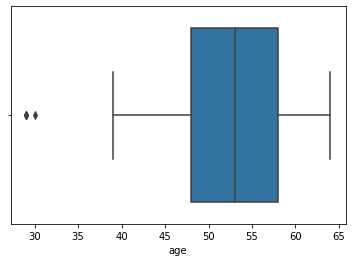

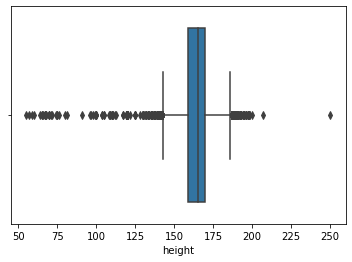

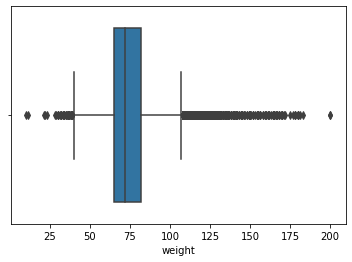

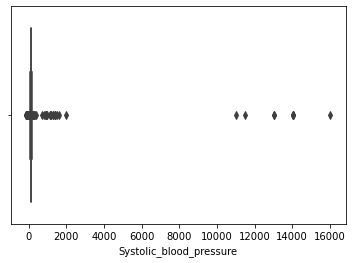

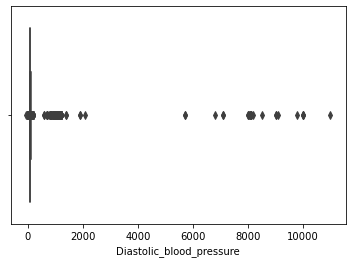

In [9]:
#checking for outliers in specific columns
cols_name = ['age', 'height', 'weight', 'Systolic_blood_pressure','Diastolic_blood_pressure']
for cols in cols_name:
    sns.boxplot(x = cols, data = cardio_data)
    plt.show()

**From the graphs above we discoverd that each columns has extreme values but i decide to ignore the** <br />
**age column and work on the rest of the column with outliers.** <br />
**Dropping the outliers is not an option because many data will be dropped, therefor i will replace with their median value.***

**From research, the table below shows the average height and weight of men and women in the world**


|Ages         | male height in cm   | male weight in kg  | female weight by height in kg |
|:-----------:|:---------------:|:---------------:|:-----------------:|
|20 to 39     |176.1cm          |89.3kg           |76.0kg     |
|40 to 59     |175.8cm          |91.1kg           |80.0kg     |
|60 and older |173.4cm          |88.3kg           |75.5kg     |






In [10]:
#checking the height and weight column
cardio_data[['height', 'weight', 'age']].agg(['max', 'min', 'mean', 'median'])

,height,weight,age
max,250.000000,200.00000,64.000000
min,55.000000,10.00000,29.000000
mean,164.359229,74.20569,52.840671
median,165.000000,72.00000,53.000000


**From the above table, we can see that the age bracket is between 29 and 64, which is good.<br />

**The min and max of height column is 55 and 250 respective, which is below and above the average height of adult, <br />
although we could deduce that they can some exceptional cases where children, tallest man and tallest women might <br />
have been examine.<br />**

**And this is also applicable to the weight column which has min and max of 10 and 200 collectively <br />**

**But that will not be factored in our analysis, therefore we will replace this exceptional cases with their median values**

In [11]:
#replace the outliers of the height 
cardio_data['height'].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [12]:
#checking for the height that is < 25th quantile and > 75th quantile
#dropping this data is not an option, because we will lose a lot of data
cardio_data[(cardio_data['height']> 170) | (cardio_data['height'] < 159)]

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0
6,9,60,1,157,93.0,130,80,3,1,0,0,1,0
7,12,61,2,178,95.0,130,90,3,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69987,99979,51,1,151,49.0,120,80,1,1,0,0,1,0
69989,99985,57,1,157,83.0,120,70,1,1,0,0,1,1
69993,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1


In [13]:
#finding the IQR range in the height column
Q1 = cardio_data['height'].quantile(0.25)
Q3 = cardio_data['height'].quantile(0.75)
IQR = Q3 - Q1
whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)
whisker_1, whisker_2

(142.5, 186.5)

In [14]:
#replacing the height < 25th quantile with whisker_1 and height > 75th quantile with whisker_2
cardio_data['height'] = np.where(cardio_data['height'] < whisker_1, whisker_1, np.where(cardio_data['height']> whisker_2,
                                                                                        whisker_2, cardio_data['height']))

cardio_data.head()

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio
0,0,50,2,168.0,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156.0,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165.0,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169.0,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156.0,56.0,100,60,1,1,0,0,0,0


In [15]:
#working on the weight outliers
cardio_data['weight'].describe()


count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [16]:
#checking for the weight that is < 25th quantile and > 75th quantile
#dropping this data is not an option, because we will lose a lot of data
cardio_data[(cardio_data['weight']> 142) | (cardio_data['weight'] < 69)]

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio
0,0,50,2,168.0,62.0,110,80,1,1,0,0,1,0
2,2,51,1,165.0,64.0,130,70,3,1,0,0,0,1
4,4,47,1,156.0,56.0,100,60,1,1,0,0,0,0
5,8,60,1,151.0,67.0,120,80,2,2,0,0,0,0
9,14,54,1,164.0,68.0,110,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69968,99956,44,2,157.0,61.0,110,90,1,1,0,0,1,0
69976,99964,59,1,163.0,65.0,120,80,2,2,0,0,1,0
69987,99979,51,1,151.0,49.0,120,80,1,1,0,0,1,0
69988,99981,60,1,160.0,59.0,110,70,1,1,0,0,1,0


In [17]:
#finding the IQR range in the weight column
weight_Q1 = cardio_data['weight'].quantile(0.25)
weight_Q3 = cardio_data['weight'].quantile(0.75)
weight_IQR = weight_Q3 - weight_Q1
weight_whisker_1 = weight_Q1 - (1.5*weight_IQR)
weight_whisker_2 = weight_Q3 + (1.5*weight_IQR)
weight_whisker_1, weight_whisker_2

(39.5, 107.5)

In [18]:
cardio_data['weight'] = np.where(cardio_data['weight'] < weight_whisker_1, weight_whisker_1, np.where(cardio_data['weight']> 
                                 weight_whisker_2, weight_whisker_2, cardio_data['weight']))
cardio_data.head()

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio
0,0,50,2,168.0,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156.0,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165.0,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169.0,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156.0,56.0,100,60,1,1,0,0,0,0


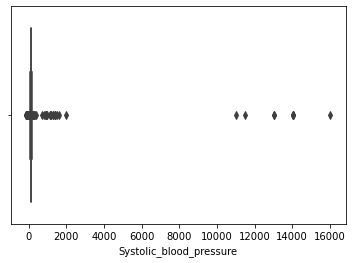

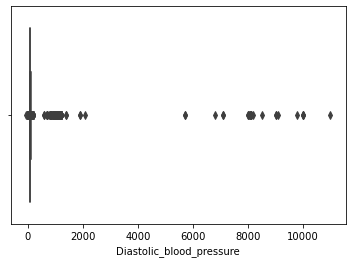

In [19]:
col = ['Systolic_blood_pressure', 'Diastolic_blood_pressure']
for i in col:
    sns.boxplot(x = i, data = cardio_data)
    plt.show()

In [20]:
#replacing the outlier values in systolic blood pressure
cardio_data['Systolic_blood_pressure'].describe()

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: Systolic_blood_pressure, dtype: float64

In [21]:
cardio_data[(cardio_data['Systolic_blood_pressure'] >140) | (cardio_data['Diastolic_blood_pressure'] < 120)]

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio
0,0,50,2,168.0,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156.0,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165.0,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169.0,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156.0,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168.0,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158.0,107.5,140,90,2,2,0,0,1,1
69997,99996,52,2,183.0,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163.0,72.0,135,80,1,2,0,0,0,1


In [22]:
#finding the IQR range in the systolic column
sys_Q1 = cardio_data['Systolic_blood_pressure'].quantile(0.25)
sys_Q3 = cardio_data['Systolic_blood_pressure'].quantile(0.75)
sys_IQR = sys_Q3 - sys_Q1
sys_whisker_1 = sys_Q1 - (1.5*sys_IQR)
sys_whisker_2 = sys_Q3 + (1.5*sys_IQR)
sys_whisker_1, sys_whisker_2

(90.0, 170.0)

In [23]:
cardio_data['Systolic_blood_pressure'] = np.where(cardio_data['Systolic_blood_pressure'] < sys_whisker_1, sys_whisker_1, 
                                                  np.where(cardio_data['Systolic_blood_pressure']> sys_whisker_2, 
                                                  sys_whisker_2, cardio_data['Systolic_blood_pressure']))
cardio_data.head()

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio
0,0,50,2,168.0,62.0,110.0,80,1,1,0,0,1,0
1,1,55,1,156.0,85.0,140.0,90,3,1,0,0,1,1
2,2,51,1,165.0,64.0,130.0,70,3,1,0,0,0,1
3,3,48,2,169.0,82.0,150.0,100,1,1,0,0,1,1
4,4,47,1,156.0,56.0,100.0,60,1,1,0,0,0,0


In [24]:
#replacing the outlier values in Diastolic blood pressure
cardio_data['Diastolic_blood_pressure'].describe()

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: Diastolic_blood_pressure, dtype: float64

In [25]:
#finding the IQR range in the diastolic column
dia_Q1 = cardio_data['Diastolic_blood_pressure'].quantile(0.25)
dia_Q3 = cardio_data['Diastolic_blood_pressure'].quantile(0.75)
dia_IQR = dia_Q3 - dia_Q1
dia_whisker_1 = dia_Q1 - (1.5*dia_IQR)
dia_whisker_2 = dia_Q3 + (1.5*dia_IQR)
dia_whisker_1, dia_whisker_2

(65.0, 105.0)

In [26]:
cardio_data['Diastolic_blood_pressure'] = np.where(cardio_data['Diastolic_blood_pressure'] < dia_whisker_1, dia_whisker_1, 
                                                  np.where(cardio_data['Diastolic_blood_pressure']> dia_whisker_2, 
                                                  dia_whisker_2, cardio_data['Diastolic_blood_pressure']))
cardio_data.head()

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio
0,0,50,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0
1,1,55,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1
2,2,51,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1
3,3,48,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1
4,4,47,1,156.0,56.0,100.0,65.0,1,1,0,0,0,0


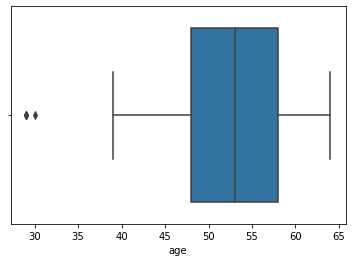

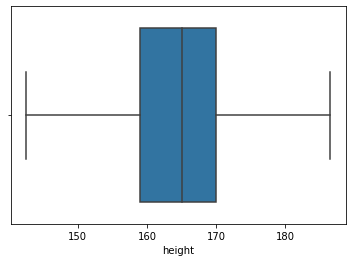

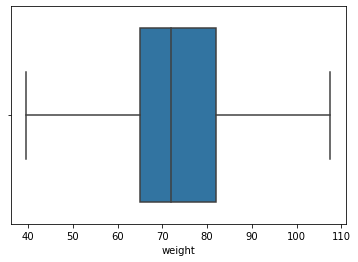

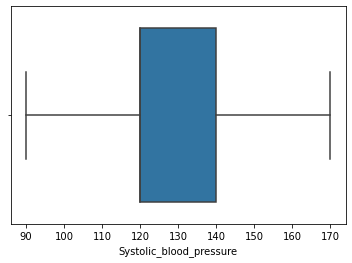

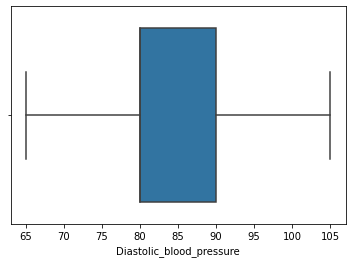

In [27]:
#cross checking if there are any outliers again
cols_name = ['age', 'height', 'weight', 'Systolic_blood_pressure','Diastolic_blood_pressure']
for cols in cols_name:
    sns.boxplot(x = cols, data = cardio_data)
    plt.show()

# Performing Explanatory Data Analysis

In [28]:
#reloading the dataset
cardio_data.head()

,id,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio
0,0,50,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0
1,1,55,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1
2,2,51,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1
3,3,48,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1
4,4,47,1,156.0,56.0,100.0,65.0,1,1,0,0,0,0


In [29]:
#making id the index column
cardio_data.set_index('id', inplace = True)

In [30]:
cardio_data.head()

,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio
id,,,,,,,,,,,,
0,50,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0
1,55,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1
2,51,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1
3,48,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1
4,47,1,156.0,56.0,100.0,65.0,1,1,0,0,0,0


In [31]:
#checking the correlation between continous data and the target variable
col = cardio_data[['age', 'height', 'weight', 'Systolic_blood_pressure','Diastolic_blood_pressure', 'cardio']]
col.corr()

,age,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cardio
age,1.000000,-0.086453,0.059432,0.208948,0.155541,0.237985
height,-0.086453,1.000000,0.316616,0.016543,0.030476,-0.012328
weight,0.059432,0.316616,1.000000,0.274166,0.258886,0.185437
Systolic_blood_pressure,0.208948,0.016543,0.274166,1.000000,0.725659,0.435366
Diastolic_blood_pressure,0.155541,0.030476,0.258886,0.725659,1.000000,0.356254
cardio,0.237985,-0.012328,0.185437,0.435366,0.356254,1.000000


**From the correlation table abvoe we could deduce that:**

**-The Systolic and Diastolic blood pressure has the highest positive correlation with the target variable and 
both data are highle correlated with each other.**

**-Height has a negative correlation with the target varibale, and research found it out that thisis true.**

**-Weight a lower positive correlation with the target variable, but there is a discovery that body mass index(bmi) is a much 
important indicator for predicting cardiovascular disease in a person.**

**-Age also has a not too strong positive correlation with the target variable.**


In [32]:
#calculating the bmi and creating a new column called bmi
#to get bmi
#converting height from cm to m by diving it by 100
cardio_data['height_m'] = cardio_data['height'] / 100
#here is the Formula: weight (kg) / [height (m)]2
cardio_data['bmi'] = np.round((cardio_data['weight'] / cardio_data['height_m']  ** 2), 1)
cardio_data

,age,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio,height_m,bmi
id,,,,,,,,,,,,,,
0,50,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0,1.68,22.0
1,55,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1,1.56,34.9
2,51,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1,1.65,23.5
3,48,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1,1.69,28.7
4,47,1,156.0,56.0,100.0,65.0,1,1,0,0,0,0,1.56,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52,2,168.0,76.0,120.0,80.0,1,1,1,0,1,0,1.68,26.9
99995,61,1,158.0,107.5,140.0,90.0,2,2,0,0,1,1,1.58,43.1
99996,52,2,183.0,105.0,170.0,90.0,3,1,0,1,0,1,1.83,31.4


In [33]:
cardio_data1=cardio_data.drop(labels='height',axis=1)

In [34]:
cardio_data2=cardio_data1.drop(labels='height_m',axis=1)

In [35]:
cardio_data3=cardio_data2.drop('weight',axis=1)
data=cardio_data3
data

,age,gender,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,cardio,bmi
id,,,,,,,,,,,
0,50,2,110.0,80.0,1,1,0,0,1,0,22.0
1,55,1,140.0,90.0,3,1,0,0,1,1,34.9
2,51,1,130.0,70.0,3,1,0,0,0,1,23.5
3,48,2,150.0,100.0,1,1,0,0,1,1,28.7
4,47,1,100.0,65.0,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...
99993,52,2,120.0,80.0,1,1,1,0,1,0,26.9
99995,61,1,140.0,90.0,2,2,0,0,1,1,43.1
99996,52,2,170.0,90.0,3,1,0,1,0,1,31.4


In [36]:
data=data.iloc[:,[0,1,2,3,4,5,6,7,8,10,9]]

In [37]:
data.head()

,age,gender,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,glucose,smoke,alcohol,active,bmi,cardio
id,,,,,,,,,,,
0,50,2,110.0,80.0,1,1,0,0,1,22.0,0
1,55,1,140.0,90.0,3,1,0,0,1,34.9,1
2,51,1,130.0,70.0,3,1,0,0,0,23.5,1
3,48,2,150.0,100.0,1,1,0,0,1,28.7,1
4,47,1,100.0,65.0,1,1,0,0,0,23.0,0


In [38]:

X=data.iloc[:,0:10].values
y = data.iloc[:,10:11].values
X

array([[ 50. ,   2. , 110. , ...,   0. ,   1. ,  22. ],
       [ 55. ,   1. , 140. , ...,   0. ,   1. ,  34.9],
       [ 51. ,   1. , 130. , ...,   0. ,   0. ,  23.5],
       ...,
       [ 52. ,   2. , 170. , ...,   1. ,   0. ,  31.4],
       [ 61. ,   1. , 135. , ...,   0. ,   0. ,  27.1],
       [ 56. ,   1. , 120. , ...,   0. ,   1. ,  24.9]])

 # Report which features were selected by RFE

In [39]:



from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset

X, y = make_classification(n_samples=70000, n_features=11, n_informative=8, n_redundant=3,
random_state=40)
# define RFE

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)
# fit RFE

rfe.fit(X, y)
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))


Column: 0, Selected=True, Rank: 1
Column: 1, Selected=False, Rank: 3
Column: 2, Selected=False, Rank: 4
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=True, Rank: 1
Column: 10, Selected=False, Rank: 2


In [40]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

X, y = make_classification(n_samples=70000, n_features=8, n_informative=8, n_redundant=0,
random_state=1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)



# discretize numeric input variables

In [41]:
 

from sklearn.datasets import make_classification
from sklearn.preprocessing import KBinsDiscretizer
# define dataset

X,y = make_classification(n_samples=70000, n_features=11, n_informative=8, n_redundant=3,
random_state=1)

# define the transform
trans = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform')
# transform the data
X = trans.fit_transform





# PCA for dimensionality reduction

In [42]:


from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

X,y = make_classification(n_samples=70000, n_features=11, n_informative=8, n_redundant=3,
random_state=20)

# define the transform
trans = PCA(n_components=8)
# transform the data
X = trans.fit_transform(X)



# MAKING PREDICTION

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=100,random_state=40)
y_pred = logreg.fit(X_train, y_train).predict(X_test)


print("Training set score:\n {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: \n{:.3f}".format(logreg.score(X_test, y_test)))
print("f1 score logistic regression:\n{:.3f}".format(f1_score(y_test,y_pred)))
print("Accuracy score logistic regression:\n{:.3f}".format(accuracy_score(y_test,y_pred)))

     
      

 

Training set score:
 0.909
Test set score: 
0.910
f1 score logistic regression:
0.910
Accuracy score logistic regression:
0.910


# Cross validation on the model

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg,X_train,y_train,cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))
print("Cross-validation mean score:\n{}".format(scores.mean()))



Cross-validation scores:
[0.90667857 0.90903571 0.90760714 0.91121429 0.90796429 0.90814286
 0.90660714 0.90782143 0.90667857 0.90896429]
Cross-validation mean score:
0.9080714285714284


# Confusion Matrix

Confusion matrix:
[[6402  573]
 [ 688 6337]]


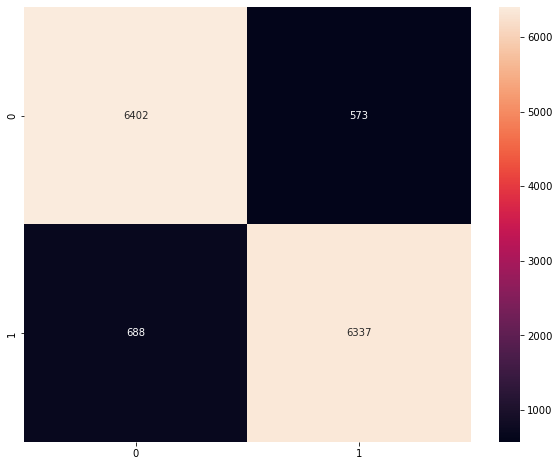

In [45]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(CM, annot=True, fmt='d')
plt.show()



# K NEAREST NEIGHBOUR (KNN)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Training set score:\n {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: \n{:.3f}".format(clf.score(X_test, y_test)))
print("f1 score KNN:\n{:.3f}".format(f1_score(y_test,y_pred)))
print("Accuracy score KNN:\n{:.3f}".format(accuracy_score(y_test,y_pred)))

Training set score:
 0.983
Test set score: 
0.978
f1 score KNN:
0.978
Accuracy score KNN:
0.978


Confusion matrix:
[[6859  116]
 [ 189 6836]]


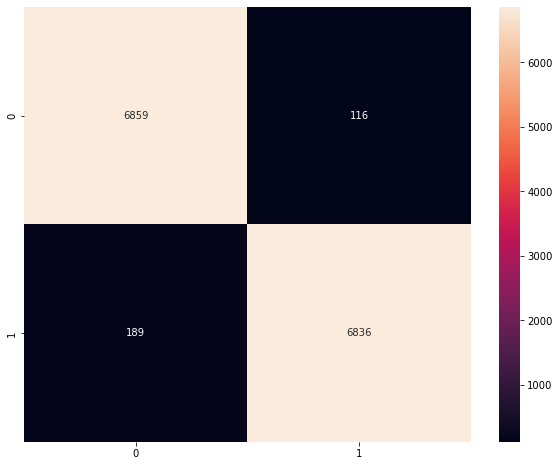

In [47]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(CM, annot=True, fmt='d')
plt.show()

In [48]:
from sklearn.metrics import classification_report
metrics=classification_report(y_pred, y_test)
print('classification report:\n',metrics)

classification report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      7048
           1       0.97      0.98      0.98      6952

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

